In [1]:
%matplotlib inline

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.linalg import norm
os.chdir("../nba/ios/")
from snap_reader import ReadGadgetSim, ReadGC21
from pynbody_routines import createPBhalo
import pynbody

In [5]:
snapshot="/home/ngc/Work/research/data/GC21/"
snapname = "MWLMC5_100M_b0_vir_OM3_G4_110.hdf5"


To load the DM particle of the host (by default galaxy=0) we use the load_halo function in nba 

In [10]:
GC21 = ReadGadgetSim(snapshot, snapname)

In [11]:
GC21_data = GC21.read_snapshot(quantity=['pos', 'vel'], ptype='dm')

In [12]:
GC21_header = GC21.read_header()

[INFO] Header 'Time': 2.203125
[INFO] Header 'Redshift': 0.0
[INFO] Header 'BoxSize': 0.0
[INFO] Header 'NumPart_Total': [        0 115000000   5780000   1400000         0]
[INFO] Header 'MassTable': [0. 0. 0. 0. 0.]


In [13]:
GC21_header

{'Time': np.float64(2.203125),
 'Redshift': np.float64(0.0),
 'BoxSize': np.float64(0.0),
 'NumPart_Total': array([        0, 115000000,   5780000,   1400000,         0],
       dtype=uint64),
 'MassTable': array([0., 0., 0., 0., 0.])}

In [14]:
GC21_header['NumPart_Total'][1]

np.uint64(115000000)

In [15]:
GC21_data['pos'].shape

(115000000, 3)

In [16]:
del(GC21_data)

In [6]:
GC21_lmc = ReadGC21(snapshot, snapname)
GC21_lmc_data = GC21_lmc.read_halo(
    ['pos', 'vel', 'mass', 'pid', 'pot'], 
    halo='LMC')

In [7]:
LMC_pb = createPBhalo(dark_part = GC21_lmc_data)

* Building halo with 15000000 dark and 0 star particles


In [25]:
GC21_lmc_data['pot']

array([-260244.42 , -250327.48 , -241843.8  , ..., -100160.164,
        -98640.39 ,  -98084.055], shape=(15000000,), dtype=float32)

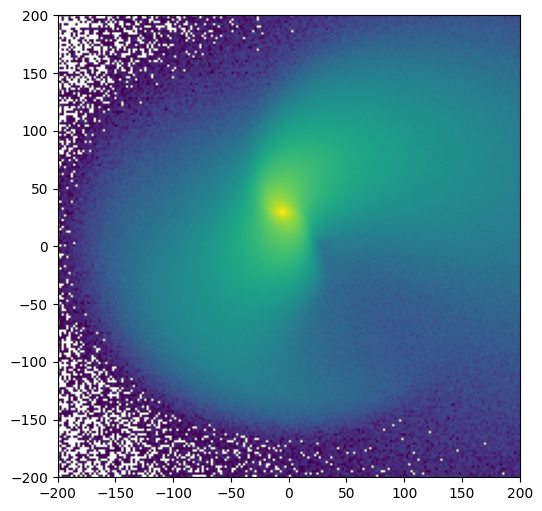

In [30]:
rsat = norm(GC21_lmc_data['pos'], axis=1)
rcut = np.where(rsat<300)[0]

plt.figure(figsize=(6,6))
Hh, xh, yh = np.histogram2d(GC21_lmc_data['pos'][rcut,1], 
                            GC21_lmc_data['pos'][rcut,2], bins=300)
plt.imshow(Hh.T, norm=LogNorm(), extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.show()

In [16]:
os.chdir("../com/")
from com_methods import CenterHalo

In [17]:
lmc_center = CenterHalo(GC21_lmc_data)

In [18]:
lmc_center.shrinking_sphere()

(array([ 13.411795,  56.20694 , -35.43957 ], dtype=float32),
 array([ -41.231922, -338.4472  ,   17.6046  ], dtype=float32))

In [19]:
lmc_center.shrinking_sphere_numba()

(array([ 13.49756388,  54.77863677, -35.23084422]),
 array([ -42.48546809, -338.81225558,   22.63471158]))

In [31]:
pynbody.analysis.center(LMC_pb, mode='com')

<Transformation translate, offset_velocity>

In [32]:
pynbody.analysis.center(LMC_pb, mode='ssc', r=100,  return_cen=True,
                        min_particles=100, particles_for_velocity=10000)


SimArray([ -7.51705348, -60.47815811,   4.59448762], 'kpc')

In [33]:
pynbody.analysis.center(LMC_pb, mode='ssc', return_cen=True)

SimArray([ -7.51829578, -60.47227127,   4.59890356], 'kpc')

In [34]:
pynbody.analysis.center(LMC_pb, mode='ssc', return_cen=True,
                        shrink_factor=0.975, min_particles=1000)

SimArray([ -7.52347254, -60.45736196,   4.58843764], 'kpc')

In [9]:
ss = pynbody.analysis.center(LMC_pb, mode='hyb', return_cen=True)

In [11]:
np.array(ss)

array([  8.62202278,  41.90541933, -10.73610564])

In [29]:
from astropy.constants import G
from astropy import units as u

In [33]:
G.to(u.kpc*u.km**2/u.Msun/u.s**2)

<Quantity 4.30091727e-06 km2 kpc / (solMass s2)>

In [2]:
50* 400 /60.

333.3333333333333